In [760]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [761]:
iterations = 100 
alpha = 0.00000001; 
train_size = 0.8
test_size = 0.2

In [762]:
df = pd.read_csv('https://raw.githubusercontent.com/pcur/ECGR-4105/main/Homework%201/Housing.csv')
M=len(df)

In [763]:
def binary_map(x):
    return x.map({'yes':1,"no":0})

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

df.shape
df[varlist] = df[varlist].apply(binary_map)
df.shape

df_train, df_test = tts(df, train_size = 0.8, test_size = 0.2)

area_raw = df_train.values[:, 1]  # get input values from second column, area
rooms_raw = df_train.values[:, 2]  # get input values from third column, bedrooms,
bath_raw = df_train.values[:, 3]  # get input values from fourth column, bathrooms
floor_raw = df_train.values[:, 4]  # get input values from fifth column, stories
park_raw = df_train.values[:, 10]  # get input values from eleventh column, parking spaces

y_train = df_train.values[:, 0]   # get output values from first column, price
y_test = df_test.values[:,0]

m_train = len(y_train) # Number of training examples 
m_test = len(y_test)


In [764]:
#create array of ones
ones_train = np.ones((m_train, 1)) 
ones_test = np.ones((m_test,1))
#rotate input arrays
area_train = area_raw.reshape(m_train, 1) 
rooms_train = rooms_raw.reshape(m_train, 1)
bath_train = bath_raw.reshape(m_train, 1)
floor_train = floor_raw.reshape(m_train, 1)
park_train = park_raw.reshape(m_train, 1)
road_train = df_train.values[:,5].reshape(m_train,1)
guest_train = df_train.values[:,6].reshape(m_train,1)
basement_train = df_train.values[:,7].reshape(m_train,1)
hotwater_train = df_train.values[:,8].reshape(m_train,1)
ac_train = df_train.values[:,9].reshape(m_train,1)
pref_train = df_train.values[:,11].reshape(m_train,1)

area_test = df_test.values[:,1].reshape(m_test, 1) 
rooms_test = df_test.values[:,2].reshape(m_test, 1) 
bath_test = df_test.values[:,3].reshape(m_test, 1) 
floor_test = df_test.values[:,4].reshape(m_test, 1) 
park_test = df_test.values[:,10].reshape(m_test, 1) 
road_test = df_test.values[:,5].reshape(m_test,1)
guest_test = df_test.values[:,6].reshape(m_test,1)
basement_test = df_test.values[:,7].reshape(m_test,1)
hotwater_test = df_test.values[:,8].reshape(m_test,1)
ac_test = df_test.values[:,9].reshape(m_test,1)
pref_test = df_test.values[:,11].reshape(m_test,1)

#stacking inputs

X_train = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train)) 
X_test = np.hstack((ones_test,area_test,rooms_test,bath_test,floor_test,park_test))
theta = np.zeros(6)


In [765]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 

  return J 

In [766]:
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y_raw : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """ 
  cost_history_train = np.zeros(iterations)
  cost_history_test = np.zeros(iterations)

  for i in range(iterations): 
    predictions = X_train.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X_train.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history_train[i] = compute_cost(X_train, y_train, theta)
    cost_history_test[i] = compute_cost(X_test,y_test,theta)
  return theta, cost_history_train,cost_history_test

In [767]:
theta = [0,0,0,0,0,0]
theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)
#linear model in form h = t1*x + t2x + t3x + t4x + t5x + t0
print('Linear Model of X:', theta[1], '* x1 +', theta[2], '* x2 +', theta[3], '* x3 +',theta[4], '* x4 +',theta[5], '* x5 +', theta[0])

Linear Model of X: 790.1867294862966 * x1 + 2.2757683061246436 * x2 + 0.8677533818797419 * x3 + 1.3694325039128412 * x4 + 0.1050158645370771 * x5 + 0.8222494253483011


array([0.8222494253483011, 790.1867294862966, 2.2757683061246436,
       0.8677533818797419, 1.3694325039128412, 0.1050158645370771],
      dtype=object)

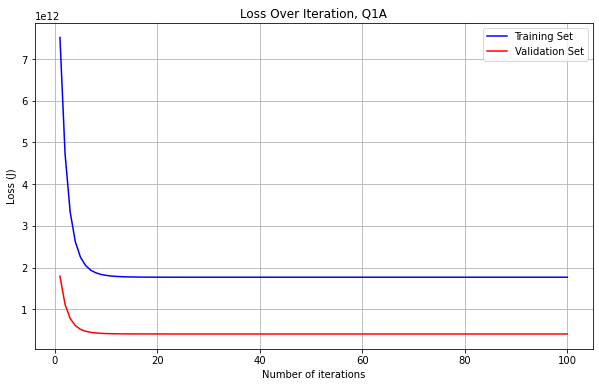

In [768]:

plt.plot(range(1, iterations + 1),cost_history_train, color = 'blue',label = 'Training Set')
plt.plot(range(1, iterations + 1),cost_history_test,color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, Q1A')
plt.legend()
theta

array([0.8222493794026104, 790.1866384117257, 2.275768168539291,
       0.8677533219071826, 1.3694324106007938, 0.10501584058779902,
       0.4584270703346099, 0.03658913661979809, 0.2020387142603173,
       0.03109559086024194, 0.14741238634476975, 0.05013847982146764],
      dtype=object)

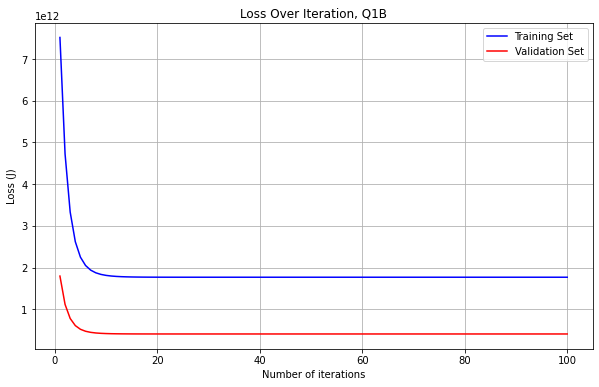

In [769]:
#Q1b
X_train = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train,road_train,guest_train,basement_train,hotwater_train,ac_train,pref_train)) 
X_test = np.hstack((ones_test, area_test, rooms_test, bath_test, floor_test,park_test,road_test,guest_test,basement_test,hotwater_test,ac_test, pref_test))

theta_1b = np.zeros(12)
X_train

theta_1b, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta_1b, alpha, iterations)


plt.plot(range(1, iterations + 1),cost_history_train, color = 'blue',label = 'Training Set')
plt.plot(range(1, iterations + 1),cost_history_test,color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, Q1B')
plt.legend()
theta_1b

array([4737116.736870233, -131279.01417799082, -93898.84425482966,
       79109.22994616407, -130773.31985892038, 217637.41078707762],
      dtype=object)

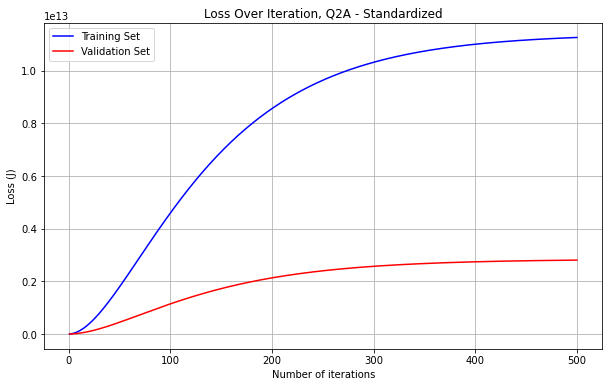

In [770]:
#Q2a
#standardizing via standardscaler
num_vars = ['price','area','bedrooms','bathrooms','stories','parking']
scaler = StandardScaler()
df_Stand = df
df_Stand[num_vars] = scaler.fit_transform(df_Stand[num_vars])
df_Stand.head(5)

df_train, df_test = tts(df_Stand, train_size = 0.8, test_size = 0.2)

y_train_stand = df_train.values[:, 0]   # get output values from first column, price
y_test_stand = df_test.values[:,0]

m_train = len(y_train_stand) # Number of training examples 
m_test = len(y_test_stand)

#create array of ones
ones_train = np.ones((m_train, 1)) 
ones_test = np.ones((m_test,1))

#rotate input arrays
area_train = df_train.values[:,1].reshape(m_train,1)
rooms_train = df_train.values[:,2].reshape(m_train,1)
bath_train = df_train.values[:,3].reshape(m_train,1)
floor_train = df_train.values[:,4].reshape(m_train,1)
park_train = df_train.values[:,10].reshape(m_train,1)
road_train = df_train.values[:,5].reshape(m_train,1)
guest_train = df_train.values[:,6].reshape(m_train,1)
basement_train = df_train.values[:,7].reshape(m_train,1)
hotwater_train = df_train.values[:,8].reshape(m_train,1)
ac_train = df_train.values[:,9].reshape(m_train,1)
pref_train = df_train.values[:,11].reshape(m_train,1)

area_test = df_test.values[:,1].reshape(m_test, 1) 
rooms_test = df_test.values[:,2].reshape(m_test, 1) 
bath_test = df_test.values[:,3].reshape(m_test, 1) 
floor_test = df_test.values[:,4].reshape(m_test, 1) 
park_test = df_test.values[:,10].reshape(m_test, 1) 
road_test = df_test.values[:,5].reshape(m_test,1)
guest_test = df_test.values[:,6].reshape(m_test,1)
basement_test = df_test.values[:,7].reshape(m_test,1)
hotwater_test = df_test.values[:,8].reshape(m_test,1)
ac_test = df_test.values[:,9].reshape(m_test,1)
pref_test = df_test.values[:,11].reshape(m_test,1)

#stacking inputs

X_train = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train)) 
X_test = np.hstack((ones_test,area_test,rooms_test,bath_test,floor_test,park_test))

X_train_stand = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train,road_train,guest_train,basement_train,hotwater_train,ac_train,pref_train)) 
X_test_stand = np.hstack((ones_test, area_test, rooms_test, bath_test, floor_test,park_test,road_test,guest_test,basement_test,hotwater_test,ac_test, pref_test))

theta = np.zeros(6)

alpha = 0.01
iterations = 500

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train_stand, X_test, y_test_stand, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history_train, color = 'blue',label = 'Training Set')
plt.plot(range(1, iterations + 1),cost_history_test,color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, Q2A - Standardized')
plt.legend()
theta

array([3705315.792318679, 713248.254752331, 1342469.2116853753,
       67090.57728438715, 599202.1108459712, 662021.5487723557],
      dtype=object)

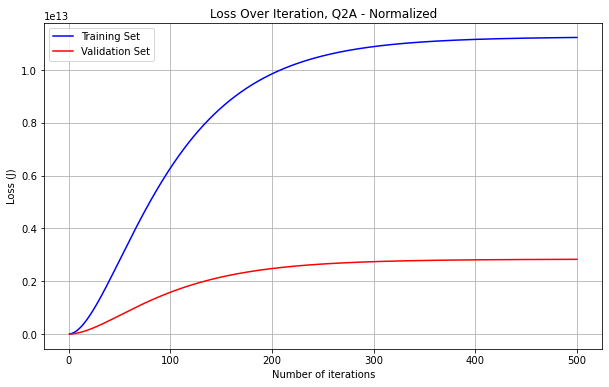

In [771]:
#Q2a
#normalizing via minmaxscaler
num_vars = ['price','area','bedrooms','bathrooms','stories','parking']
scaler = MinMaxScaler()
df_Stand = df
df_Stand[num_vars] = scaler.fit_transform(df_Stand[num_vars])
df_Stand.head(5)

df_train, df_test = tts(df_Stand, train_size = 0.8, test_size = 0.2)

y_train_norm = df_train.values[:, 0]   # get output values from first column, price
y_test_norm = df_test.values[:,0]

m_train = len(y_train_norm) # Number of training examples 
m_test = len(y_test_norm)

#create array of ones
ones_train = np.ones((m_train, 1)) 
ones_test = np.ones((m_test,1))

#rotate input arrays
area_train = df_train.values[:,1].reshape(m_train,1)
rooms_train = df_train.values[:,2].reshape(m_train,1)
bath_train = df_train.values[:,3].reshape(m_train,1)
floor_train = df_train.values[:,4].reshape(m_train,1)
park_train = df_train.values[:,10].reshape(m_train,1)
road_train = df_train.values[:,5].reshape(m_train,1)
guest_train = df_train.values[:,6].reshape(m_train,1)
basement_train = df_train.values[:,7].reshape(m_train,1)
hotwater_train = df_train.values[:,8].reshape(m_train,1)
ac_train = df_train.values[:,9].reshape(m_train,1)
pref_train = df_train.values[:,11].reshape(m_train,1)

area_test = df_test.values[:,1].reshape(m_test, 1) 
rooms_test = df_test.values[:,2].reshape(m_test, 1) 
bath_test = df_test.values[:,3].reshape(m_test, 1) 
floor_test = df_test.values[:,4].reshape(m_test, 1) 
park_test = df_test.values[:,10].reshape(m_test, 1) 
road_test = df_test.values[:,5].reshape(m_test,1)
guest_test = df_test.values[:,6].reshape(m_test,1)
basement_test = df_test.values[:,7].reshape(m_test,1)
hotwater_test = df_test.values[:,8].reshape(m_test,1)
ac_test = df_test.values[:,9].reshape(m_test,1)
pref_test = df_test.values[:,11].reshape(m_test,1)

#stacking inputs

X_train = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train)) 
X_test = np.hstack((ones_test,area_test,rooms_test,bath_test,floor_test,park_test))

X_train_norm = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train,road_train,guest_train,basement_train,hotwater_train,ac_train,pref_train)) 
X_test_norm = np.hstack((ones_test, area_test, rooms_test, bath_test, floor_test,park_test,road_test,guest_test,basement_test,hotwater_test,ac_test, pref_test))

theta = np.zeros(6)


alpha = 0.01
iterations = 500

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train_norm, X_test, y_test_norm, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history_train, color = 'blue',label = 'Training Set')
plt.plot(range(1, iterations + 1),cost_history_test,color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, Q2A - Normalized')
plt.legend()
theta

array([2569734.7374997996, 353623.9914589018, 940127.1911532326,
       -44468.80592524908, 382916.60438302887, 350230.33779000497,
       1427266.9646202081, 197166.8672729365, 460939.45317407907,
       156734.8033835241, -104190.89275733347, 165130.53042422346],
      dtype=object)

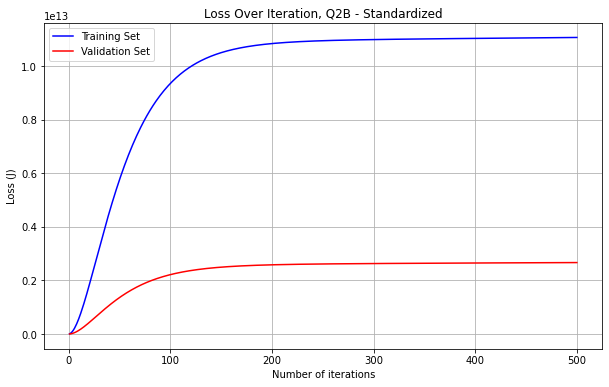

In [772]:
#Q2b

X_train_stand = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train,road_train,guest_train,basement_train,hotwater_train,ac_train,pref_train)) 
X_test_stand = np.hstack((ones_test, area_test, rooms_test, bath_test, floor_test,park_test,road_test,guest_test,basement_test,hotwater_test,ac_test, pref_test))

theta_1b = np.zeros(12)

theta_1b, cost_history_train, cost_history_test = gradient_descent(X_train_stand, y_train_stand, X_test_stand, y_test_stand, theta_1b, alpha, iterations)


plt.plot(range(1, iterations + 1),cost_history_train, color = 'blue',label = 'Training Set')
plt.plot(range(1, iterations + 1),cost_history_test,color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, Q2B - Standardized')
plt.legend()
theta_1b

array([2569734.7374997996, 353623.9914589018, 940127.1911532326,
       -44468.80592524908, 382916.60438302887, 350230.33779000497,
       1427266.9646202081, 197166.8672729365, 460939.45317407907,
       156734.8033835241, -104190.89275733347, 165130.53042422346],
      dtype=object)

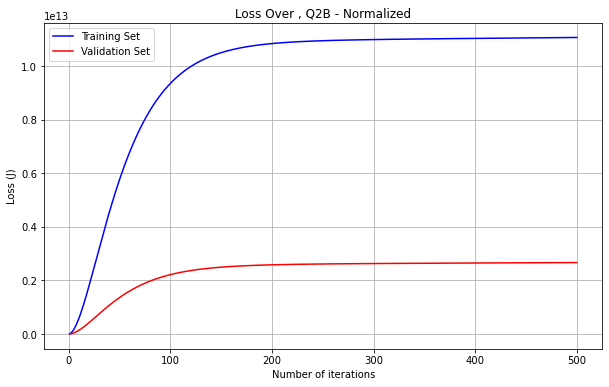

In [773]:
X_train_norm = np.hstack((ones_train, area_train, rooms_train, bath_train,floor_train,park_train,road_train,guest_train,basement_train,hotwater_train,ac_train,pref_train)) 
X_test_norm = np.hstack((ones_test, area_test, rooms_test, bath_test, floor_test,park_test,road_test,guest_test,basement_test,hotwater_test,ac_test, pref_test))

theta_1b = np.zeros(12)
X_train

theta_1b, cost_history_train, cost_history_test = gradient_descent(X_train_norm, y_train_norm, X_test_norm, y_test_norm, theta_1b, alpha, iterations)


plt.plot(range(1, iterations + 1),cost_history_train, color = 'blue',label = 'Training Set')
plt.plot(range(1, iterations + 1),cost_history_test,color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over , Q2B - Normalized')
plt.legend()
theta_1b

In [774]:
#Q3